Importing necessary modules

In [40]:
from sklearn.datasets import load_iris
import numpy as np
import math

Load DataSet

In [214]:
data = load_iris()
x= X = data.data[:100, :2]
x = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = data.target[:100]

Plotting Dataset

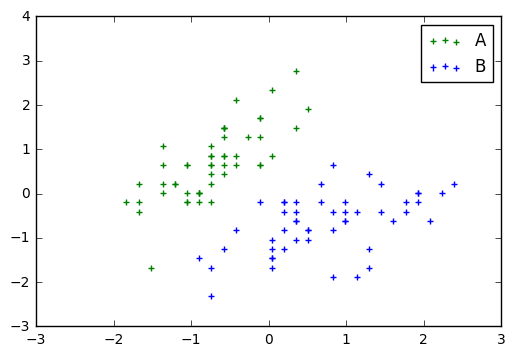

In [215]:
import matplotlib.pyplot as plt
plt.scatter(x[:50,0], x[:50,1], label='A', color = 'green', marker='+')
plt.scatter(x[50:,0], x[50:,1], label='B', color = 'blue', marker='+')
plt.legend()
plt.show()

Logistic and Cost function 

In [250]:
def logit(betaZero, betaOne, betaTwo, x_i):
    return  1.0/(1 + math.e**(-(betaZero + betaOne*x_i[0] + betaTwo*x_i[1])))  

def cost_func(betaZero, betaOne, betaTwo):
    n = len(x)
    return -1.0/n * sum([( y[i]*math.log(logit(betaZero, betaOne, betaTwo, x[i])) + 
                        (1-y[i])*math.log(1-logit(betaZero, betaOne, betaTwo, x[i]))) 
                        for i in range(n)])

In [251]:
def gradient_descent():
    betaZero = 0.0
    betaOne = 0.0
    betaTwo = 0.0
    alpha = .01  
    iter = 0
    ep = .001
    max_iter = 100
    converged = False
    # J(theta)
    J = cost_func(betaZero, betaOne, betaTwo)
    n = len(x)
    while not converged :          
        gradZero= 1.0/n * sum([(logit(betaZero, betaOne, betaTwo, x[i]) - y[i]) for i in range(n)])
        gradOne = 1.0/n * sum([(logit(betaZero, betaOne, betaTwo, x[i]) - y[i])*x[i,0] for i in range(n)])
        gradTwo = 1.0/n * sum([(logit(betaZero, betaOne, betaTwo, x[i]) - y[i])*x[i,1] for i in range(n)])
        
        betaZero = betaZero - alpha * gradZero
        betaOne = betaOne - alpha * gradOne
        betaTwo = betaTwo - alpha * gradTwo
        error = cost_func(betaZero, betaOne, betaTwo)
        if abs(J - error) < ep :
            print ("Converged")
            converged = True           
        J = error           
        iter += 1           
        if iter == max_iter :
            print("Max iteration Reached")
            converged = True
    
    return (betaZero,betaOne,betaTwo)

betaZero,betaOne,betaTwo = gradient_descent()

Max iteration Reached


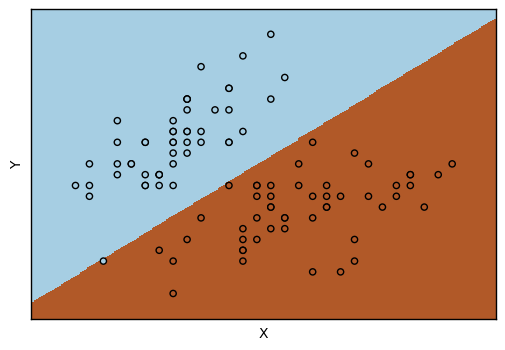

In [252]:
def plot_prediction(xx,yy,l):
    plt.pcolormesh(xx, yy, l, cmap=plt.cm.Paired)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
def prediction():
    predicted_class = []
    xx, yy = np.meshgrid(np.arange(x[:,0].min()-.5, x[:, 0].max()+.5, .02), np.arange(x[:,1].min()-.5, x[:, 1].max()+.5,.02))
    for testPoint in np.c_[xx.ravel(), yy.ravel()]:
        prob = logit(betaZero, betaOne, betaTwo,testPoint)
        if prob >= .5 :
            predicted_class.append(1)
        else:
            predicted_class.append(0)
    predicted_class = np.array(predicted_class).reshape(xx.shape)
    plot_prediction(xx,yy,predicted_class)
prediction()
